# Прогнозирование оттока клиентов компании 

Компанией поставлена задача сократить отток клиентов. Для этого необходимо создать модель прогнозирования оттока клиентов из компании, в случае, когда модель предскажет, что пользователь планирует уйти, ему будут предложены промокоды и специальные условия.

Входные данные: персональные данные о некоторых клиентах, информация об их тарифах и договорах.


### Описание услуг

Оператор предоставляет два основных типа услуг: 

1. Стационарную телефонную связь. Возможно подключение телефонного аппарата к нескольким линиям одновременно.
2. Интернет. Подключение может быть двух типов: через телефонную линию (DSL*,* от англ. *digital subscriber line*, «цифровая абонентская линия») или оптоволоконный кабель (*Fiber optic*).  

Также доступны такие услуги:

- Интернет-безопасность: антивирус (*DeviceProtection*) и блокировка небезопасных сайтов (*OnlineSecurity*);
- Выделенная линия технической поддержки (*TechSupport*);
- Облачное хранилище файлов для резервного копирования данных (*OnlineBackup*);
- Стриминговое телевидение (*StreamingTV*) и каталог фильмов (*StreamingMovies*).

За услуги клиенты могут платить каждый месяц или заключить договор на 1–2 года. Доступны различные способы расчёта и возможность получения электронного чека.

### Описание данных

Данные состоят из файлов, полученных из разных источников:

- `contract.csv` — информация о договоре;
- `personal.csv` — персональные данные клиента;
- `internet.csv` — информация об интернет-услугах;
- `phone.csv` — информация об услугах телефонии.

Во всех файлах столбец `customerID` содержит код клиента.

Информация о договорах актуальна на 1 февраля 2020.

### Описание полей данных 

- BeginDate – дата начала пользования услугами,
- EndDate – дата окончания пользования услугами,
- Type – тип договора: ежемесячный, годовой и т.д,
- PaperlessBilling – факт выставления счёта на электронную почту,
- PaymentMethod – способ оплаты,
- MonthlyCharges – ежемесячные траты на услуги,
- TotalCharges – всего потрачено денег на услуги,
- Dependents – наличие иждивенцев,
- Senior Citizen – наличие пенсионного статуса по возрасту,
- Partner – наличие супруга(и),
- MultipleLines – наличие возможности ведения параллельных линий во
- время звонка.

`Цель:` создание модели классификации клиентов компании

`План:`

1. Исследовательский анализ данных. Предобработка.
  -  загрузить данные
  -  посмотреть основную статистику данных
  -  изменить типы данных по необходимости
  -  объединить данные
  -  проверить наличие пропусков
  -  проверить наличие дубликатов 
  -  отследить дисбаланс классов
  -  проверить наличие выбросов и аномалий  
2. Обучение различных моделей классифицировать клиентов, подбор гиперпараметров.
  -  отбор и подготовка признаков
  -  разделение данных на выборки
  -  выбор моделей для реализации
  -  подбор гиперпараметров и реализация моделей
3. Тестирование.
  -  тестирование моделей на тестовых данных
  -  возможно, корректировка параметров  
4. Отбор наиболее подходящего инструмента с учетом метрики.
  -  выбор модели наилучшим образом выполняющую задачу.  
5. Отчет.

`Метрика:` основная метрика качества AUC-ROC, дополнительная accuracy

`Условие  принятия:` значение метрики качества не меньше 0.75.

`random state:` 120922

`Целевой признак:` EndDate = No


## Исследовательский анализ данных
### Загрузка и изучение данных

In [1]:
!pip install phik

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Игнорирование предупреждений
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import roc_auc_score, make_scorer
from sklearn.utils import shuffle
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
import phik
from phik.report import plot_correlation_matrix
from phik import report
from sklearn.preprocessing import StandardScaler

In [3]:
path ='./datasets/final_provider/'
random_state= 120922

In [4]:
try:
    contract = pd.read_csv(path + 'contract.csv')
    internet = pd.read_csv(path + 'internet.csv')
    personal = pd.read_csv(path + 'personal.csv')
    phone = pd.read_csv(path + 'phone.csv')
    print('local')
except:
    contract = pd.read_csv('/datasets/final_provider/contract.csv')
    internet = pd.read_csv('/datasets/final_provider/internet.csv')
    personal = pd.read_csv('/datasets/final_provider/personal.csv')
    phone = pd.read_csv('/datasets/final_provider/phone.csv')
    print('server')

server


In [5]:
print(contract.info())
print(contract.shape)
contract.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB
None
(7043, 8)


,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65


In [6]:
contract['BeginDate'].min()

'2013-10-01'

In [7]:
contract.describe(include='all')

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
count,7043,7043,7043,7043,7043,7043,7043.000000,7043
unique,7043,77,5,3,2,4,NaN,6531
top,9959-WOFKT,2014-02-01,No,Month-to-month,Yes,Electronic check,NaN,
freq,1,366,5174,3875,4171,2365,NaN,11
mean,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN


Датасет `contract`. 
- Содержит информацию о договорах.
- Размер (7043, 8).
- Тип всех столбцов, кроме "MonthlyCharges"(float64) - object, что не соответствует данным. Необходимо заменить тип BeginDate, EndDate, TotalCharges.  
- Судя по основной информации пропусков нет.
- Так как числовый признак единственный, описательную статистику можно посмотреть только по этому столбцу.
- Наименьшая дата '2013-10-01'

In [8]:
print(internet.info())
print(internet.shape)
internet.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB
None
(5517, 8)


,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No


Датасет `internet`. 
- Содержит информацию об интернет-услугах.
- Размер (5517, 8). Меньше, чем контрактов, не все используют данные услуги.
- Судя по основной информации пропусков нет.
- Тип всех столбцов - object 

In [9]:
print(personal.info())
print(personal.shape)
personal.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB
None
(7043, 5)


,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


Датасет `personal`. 
- Содержит персональные данные клиента.
- Размер (7043, 5). 
- Судя по основной информации пропусков нет.
- Тип всех столбцов - object, кроме SeniorCitizen - int64. 

In [10]:
print(phone.info())
print(phone.shape)
phone.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB
None
(6361, 2)


,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes


Датасет `phone`. 
- Содержит информацию об услугах телефонии.
- Размер (6361, 2). Меньше, чем контрактов, не все используют данные услуги.
- Судя по основной информации пропусков нет.
- Тип всех столбцов - object 

#### Вывод:
Нам предоставлены полные(без пропусков) данные о некоторых клиентах, информация об их тарифах и договорах начиная с '2013-10-01'. Если у клиента в поле 'EndDate' стоит 'No',значит до '2020-02-01' его договор не был закрыт.

Это поле является целевым признаком, но имеет не самый удобный формат, возможно стоит завести отдельное поле целевого признака в формате [0.1]

В данных по телефонии и интернету строк(клиентов) значительно меньше, это связано с тем что не все клиенты пользуются данными услугами. Кол-во строк в данных о контрактах и содержащих личную информацию о клиентах совпадает.

В некоторых полях необходимо поменять тип данных.

## Предобработка

### Объединение таблиц

Важно не потерять клиентов при объединении таблиц, используем атрибут  how='left'

In [11]:
data = contract.set_index('customerID').join(personal.set_index('customerID'), how='left')
data = data.join(internet.set_index('customerID'), how='left')
data = data.join(phone.set_index('customerID'), how='left')
data.shape

(7043, 19)

In [12]:
data.head()

,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines
customerID,,,,,,,,,,,,,,,,,,,
7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85,Female,0,Yes,No,DSL,No,Yes,No,No,No,No,NaN
5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5,Male,0,No,No,DSL,Yes,No,Yes,No,No,No,No
3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15,Male,0,No,No,DSL,Yes,Yes,No,No,No,No,No
7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75,Male,0,No,No,DSL,Yes,No,Yes,Yes,No,No,NaN
9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65,Female,0,No,No,Fiber optic,No,No,No,No,No,No,No


Размер объединенной таблицы 7043, данные всех клиентов сохранены.

### Изменение типов данных

Прежде, чем изменить типы данных их нужно подготовить.
Будем преобразовывать столбцы: BeginDate, EndDate, TotalCharges.
Нужно убрать значение "No" из EndDate, и " " из TotalCharges.

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   BeginDate         7043 non-null   object 
 1   EndDate           7043 non-null   object 
 2   Type              7043 non-null   object 
 3   PaperlessBilling  7043 non-null   object 
 4   PaymentMethod     7043 non-null   object 
 5   MonthlyCharges    7043 non-null   float64
 6   TotalCharges      7043 non-null   object 
 7   gender            7043 non-null   object 
 8   SeniorCitizen     7043 non-null   int64  
 9   Partner           7043 non-null   object 
 10  Dependents        7043 non-null   object 
 11  InternetService   5517 non-null   object 
 12  OnlineSecurity    5517 non-null   object 
 13  OnlineBackup      5517 non-null   object 
 14  DeviceProtection  5517 non-null   object 
 15  TechSupport       5517 non-null   object 
 16  StreamingTV       5517 non-null 

In [14]:
data.loc[data['EndDate']=='No',['EndDate']]= '2020-02-01'

In [15]:
data.loc[data['TotalCharges'] == ' ']

,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines
customerID,,,,,,,,,,,,,,,,,,,
4472-LVYGI,2020-02-01,2020-02-01,Two year,Yes,Bank transfer (automatic),52.55,,Female,0,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,No,NaN
3115-CZMZD,2020-02-01,2020-02-01,Two year,No,Mailed check,20.25,,Male,0,No,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
5709-LVOEQ,2020-02-01,2020-02-01,Two year,No,Mailed check,80.85,,Female,0,Yes,Yes,DSL,Yes,Yes,Yes,No,Yes,Yes,No
4367-NUYAO,2020-02-01,2020-02-01,Two year,No,Mailed check,25.75,,Male,0,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes
1371-DWPAZ,2020-02-01,2020-02-01,Two year,No,Credit card (automatic),56.05,,Female,0,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,No,NaN
7644-OMVMY,2020-02-01,2020-02-01,Two year,No,Mailed check,19.85,,Male,0,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
3213-VVOLG,2020-02-01,2020-02-01,Two year,No,Mailed check,25.35,,Male,0,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes
2520-SGTTA,2020-02-01,2020-02-01,Two year,No,Mailed check,20.00,,Female,0,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
2923-ARZLG,2020-02-01,2020-02-01,One year,Yes,Mailed check,19.70,,Male,0,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No


In [16]:
data.loc[data['TotalCharges'] == ' ',['TotalCharges']]=-1 

In [17]:
data['BeginDate'] = pd.to_datetime(data['BeginDate'])
data['EndDate'] = pd.to_datetime(data['EndDate'])
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'])

data.head()

,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines
customerID,,,,,,,,,,,,,,,,,,,
7590-VHVEG,2020-01-01,2020-02-01,Month-to-month,Yes,Electronic check,29.85,29.85,Female,0,Yes,No,DSL,No,Yes,No,No,No,No,NaN
5575-GNVDE,2017-04-01,2020-02-01,One year,No,Mailed check,56.95,1889.50,Male,0,No,No,DSL,Yes,No,Yes,No,No,No,No
3668-QPYBK,2019-10-01,2019-12-01,Month-to-month,Yes,Mailed check,53.85,108.15,Male,0,No,No,DSL,Yes,Yes,No,No,No,No,No
7795-CFOCW,2016-05-01,2020-02-01,One year,No,Bank transfer (automatic),42.30,1840.75,Male,0,No,No,DSL,Yes,No,Yes,Yes,No,No,NaN
9237-HQITU,2019-09-01,2019-11-01,Month-to-month,Yes,Electronic check,70.70,151.65,Female,0,No,No,Fiber optic,No,No,No,No,No,No,No


In [18]:
data['TotalCharges'].median()

1394.55

In [19]:
data = data.loc[data['TotalCharges'] != -1]

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   BeginDate         7032 non-null   datetime64[ns]
 1   EndDate           7032 non-null   datetime64[ns]
 2   Type              7032 non-null   object        
 3   PaperlessBilling  7032 non-null   object        
 4   PaymentMethod     7032 non-null   object        
 5   MonthlyCharges    7032 non-null   float64       
 6   TotalCharges      7032 non-null   float64       
 7   gender            7032 non-null   object        
 8   SeniorCitizen     7032 non-null   int64         
 9   Partner           7032 non-null   object        
 10  Dependents        7032 non-null   object        
 11  InternetService   5512 non-null   object        
 12  OnlineSecurity    5512 non-null   object        
 13  OnlineBackup      5512 non-null   object        
 14  DeviceProtecti

Семантически бинарные признаки ткаие как gender, Partner, PaperlessBilling и др. позже можно преобразовать при помощи OHE.

### Работа с пропусками

In [21]:
# подсчёт доли пропусков

data.isnull().sum()/data.shape[0]

BeginDate           0.000000
EndDate             0.000000
Type                0.000000
PaperlessBilling    0.000000
PaymentMethod       0.000000
MonthlyCharges      0.000000
TotalCharges        0.000000
gender              0.000000
SeniorCitizen       0.000000
Partner             0.000000
Dependents          0.000000
InternetService     0.216155
OnlineSecurity      0.216155
OnlineBackup        0.216155
DeviceProtection    0.216155
TechSupport         0.216155
StreamingTV         0.216155
StreamingMovies     0.216155
MultipleLines       0.096701
dtype: float64

In [22]:
data.loc[data['InternetService'].isnull()==True].index == data.loc[data['OnlineSecurity'].isnull()==True].index

array([ True,  True,  True, ...,  True,  True,  True])

In [23]:
data.loc[data['InternetService'].isnull()==True].head()

,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines
customerID,,,,,,,,,,,,,,,,,,,
7469-LKBCI,2018-10-01,2020-02-01,Two year,No,Credit card (automatic),18.95,326.80,Male,0,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
8191-XWSZG,2015-10-01,2020-02-01,One year,No,Mailed check,20.65,1022.95,Female,0,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
1680-VDCWW,2019-02-01,2020-02-01,One year,No,Bank transfer (automatic),19.80,202.25,Male,0,Yes,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
1066-JKSGK,2019-11-01,2019-12-01,Month-to-month,No,Mailed check,20.15,20.15,Male,0,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
7310-EGVHZ,2020-01-01,2020-02-01,Month-to-month,No,Bank transfer (automatic),20.20,20.20,Male,0,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No


Построим хитмэп, чтобы посмотреть где сконцентрированы пропуски

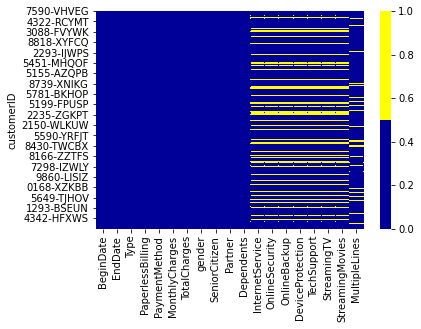

In [24]:
cols = data.columns
# желтый - пропущенные данные, синий - не пропущенные
colours = ['#000099', '#ffff00'] 
sns.heatmap(data[cols].isnull(), cmap=sns.color_palette(colours))
plt.show()

In [25]:
# подсчет пропусков до объединения
    
df_list = [contract, internet, personal, phone]

for df in df_list:
    print(df.isnull().sum())
    

customerID          0
BeginDate           0
EndDate             0
Type                0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64
customerID          0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
dtype: int64
customerID       0
gender           0
SeniorCitizen    0
Partner          0
Dependents       0
dtype: int64
customerID       0
MultipleLines    0
dtype: int64


Все пропуски появились в результате объединения таблиц, то есть пропущенные значения можно заменить на "No", так как клиенты не входящие в таблицы, не пользуются данными услугами

In [26]:
data = data.fillna('No')

In [27]:
data.isnull().sum()/data.shape[0]

BeginDate           0.0
EndDate             0.0
Type                0.0
PaperlessBilling    0.0
PaymentMethod       0.0
MonthlyCharges      0.0
TotalCharges        0.0
gender              0.0
SeniorCitizen       0.0
Partner             0.0
Dependents          0.0
InternetService     0.0
OnlineSecurity      0.0
OnlineBackup        0.0
DeviceProtection    0.0
TechSupport         0.0
StreamingTV         0.0
StreamingMovies     0.0
MultipleLines       0.0
dtype: float64

### Работа с дубликатами

In [28]:
data.duplicated().sum()

13

В таблице есть явные дубликаты, их можно удалить.

In [29]:
data = data.drop_duplicates()
data.duplicated().sum()

0

Приведем все строковые столбцы к нижнему регистру, чтобы снизить вероятность неявных дубликатов.

In [30]:
obj_type = ['Type', 'PaperlessBilling','PaymentMethod','gender','Partner','Dependents','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','MultipleLines']

for column in obj_type:
    data[column] = data[column].str.lower()

In [31]:
data.duplicated().sum()

0

Просмотрим уникальные значения строковых столбцов, для поиска неявных дубликатов.

In [32]:
obj_type = ['Type', 'PaperlessBilling','PaymentMethod','gender','Partner','Dependents','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','MultipleLines']

for column in obj_type:
    print(data[column].unique())

['month-to-month' 'one year' 'two year']
['yes' 'no']
['electronic check' 'mailed check' 'bank transfer (automatic)'
 'credit card (automatic)']
['female' 'male']
['yes' 'no']
['no' 'yes']
['dsl' 'fiber optic' 'no']
['no' 'yes']
['yes' 'no']
['no' 'yes']
['no' 'yes']
['no' 'yes']
['no' 'yes']
['no' 'yes']


Неявных дубликатов нет.

### Дисбаланс классов

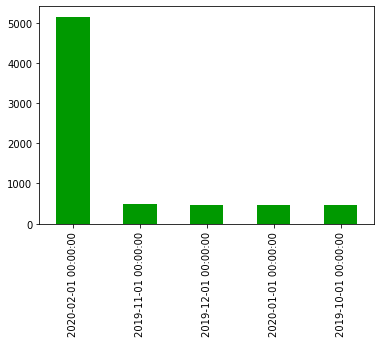

In [33]:
data['EndDate'].value_counts().plot(kind='bar', color='#009900')
plt.show()

Создадим дополнительный столбец целевого признака [0,1]

In [34]:
data['target'] = np.where(data['EndDate'] == '2020-02-01', 0, 1)

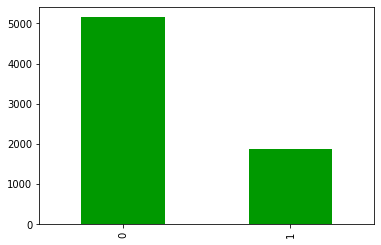

In [35]:
data['target'].value_counts().plot(kind='bar', color='#009900')
plt.show()

Виден значительный дисбаланс классов, учтем это в дальнейшем.

### Исследование выбросов и аномалий.

In [36]:
data.columns

Index(['BeginDate', 'EndDate', 'Type', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'MultipleLines', 'target'],
      dtype='object')

In [37]:
numeric = ['MonthlyCharges', 'TotalCharges']

In [38]:
def distplot_anomalies(data,numeric):
    fig, axes = plt.subplots(2, 1, figsize=(12, 10))
    for column, ax in zip(numeric, axes.ravel()):
        ax.set_title(column)
        sns.distplot(data[column], ax=ax)
        
def boxplot_anomalies(data,numeric):    
    fig, axes = plt.subplots(2, 1, figsize=(12, 10))
    for column, ax in zip(numeric, axes.ravel()):
        ax.set_title(column)
        sns.boxplot(data[column], ax=ax)    

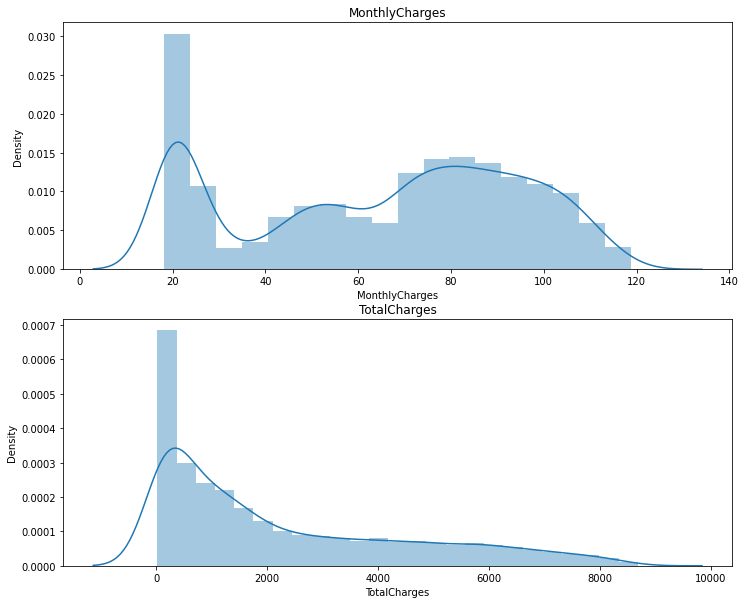

In [39]:
distplot_anomalies(data,numeric)

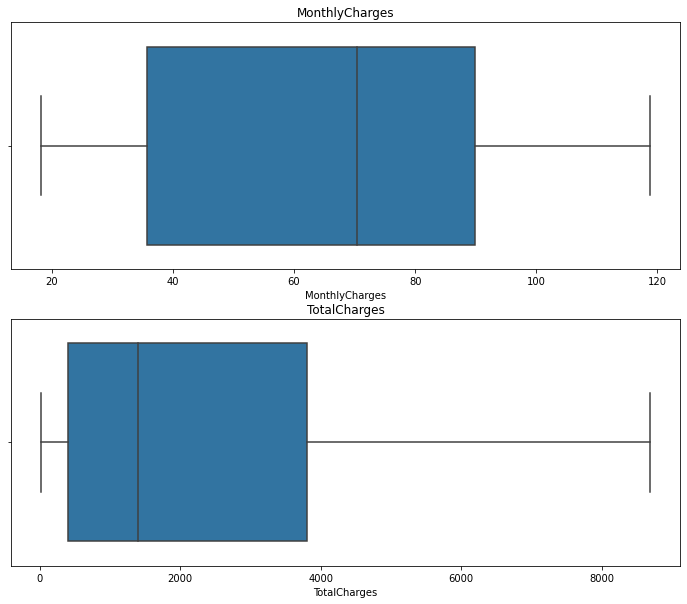

In [40]:
boxplot_anomalies(data,numeric)

In [41]:
data.loc[data['MonthlyCharges'] < 35].head(5)

,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines,target
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,2020-01-01,2020-02-01,month-to-month,yes,electronic check,29.85,29.85,female,0,yes,no,dsl,no,yes,no,no,no,no,no,0
6713-OKOMC,2019-04-01,2020-02-01,month-to-month,no,mailed check,29.75,301.90,female,0,no,no,dsl,yes,no,no,no,no,no,no,0
7469-LKBCI,2018-10-01,2020-02-01,two year,no,credit card (automatic),18.95,326.80,male,0,no,no,no,no,no,no,no,no,no,no,0
8191-XWSZG,2015-10-01,2020-02-01,one year,no,mailed check,20.65,1022.95,female,0,no,no,no,no,no,no,no,no,no,no,0
1680-VDCWW,2019-02-01,2020-02-01,one year,no,bank transfer (automatic),19.80,202.25,male,0,yes,no,no,no,no,no,no,no,no,no,0


In [42]:
data.loc[data['MonthlyCharges'] < 35].shape[0]/data.shape[0]

0.2441943296765921

In [43]:
data.loc[data['MonthlyCharges'] > 100].shape[0]/data.shape[0]

0.128508334520587

In [44]:
data['MonthlyCharges'].describe()

count    7019.000000
mean       64.866954
std        30.061559
min        18.250000
25%        35.750000
50%        70.400000
75%        89.900000
max       118.750000
Name: MonthlyCharges, dtype: float64

In [45]:
data.loc[data['TotalCharges'] < 100].shape[0]/data.shape[0]

0.11397634990739422

In [46]:
data.loc[data['TotalCharges'] > 5000].shape[0]/data.shape[0]

0.16170394643111555

In [47]:
data['TotalCharges'].describe()

count    7019.000000
mean     2287.478109
std      2266.787988
min        18.800000
25%       404.275000
50%      1400.850000
75%      3803.050000
max      8684.800000
Name: TotalCharges, dtype: float64

Для 'MonthlyCharges'виден скачок в районе [20.30], но это скорее особенность данных, чем аномалия.Если посмотреть данные, люди не пльзуются большей частью услуг, что кажется обычным.
Этот выброс занимает почти 25% данных.

Для 'TotalCharges' выброс в районе [0,250] и > 4000.

Предоставленные нам данные являются актуальными и выбросами их лучше не считать. Тем более удаление более 30% данных - это плохо для решения задачи.

Оставим аномалии.

In [48]:
data.shape

(7019, 20)

In [49]:
data.loc[data['MonthlyCharges'] < 20].shape[0]/data.shape[0]

0.08662202592961961

In [50]:
data.shape

(7019, 20)

### Общий вывод этапа:

- После первоначальной предобработки объем данных составляет (7030, 20).

- Обработаны пропуски, дубликаты и аномалии.

- Множество семантически бинарных признаков, возможно будет использовано OHE.

- Явновыраженный дисбаланс классов,  требуется балансировка. 

- В данных достаточно много признаков, будет проведен отбор наиболее значимых

### Подготовка признаков

Обработаем категориальные признаки. Для того чтобы слишком не множить столбцы, семантически бинарные признаки заменим напрямую на [0,1], для остальных используем OHE.

In [51]:
obj_type = ['Type', 'PaperlessBilling','PaymentMethod','gender','Partner','Dependents','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','MultipleLines']

for column in obj_type:
    print(data[column].unique())

['month-to-month' 'one year' 'two year']
['yes' 'no']
['electronic check' 'mailed check' 'bank transfer (automatic)'
 'credit card (automatic)']
['female' 'male']
['yes' 'no']
['no' 'yes']
['dsl' 'fiber optic' 'no']
['no' 'yes']
['yes' 'no']
['no' 'yes']
['no' 'yes']
['no' 'yes']
['no' 'yes']
['no' 'yes']


In [52]:
columns = ['PaperlessBilling','Partner','Dependents','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','MultipleLines']
for column in columns:
    data.loc[data[column]=='no',[column]]= 0
    data.loc[data[column]=='yes',[column]]= 1

In [53]:
obj_type = ['Type', 'PaperlessBilling','PaymentMethod','gender','Partner','Dependents','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','MultipleLines']

for column in obj_type:
    print(data[column].unique())

['month-to-month' 'one year' 'two year']
[1 0]
['electronic check' 'mailed check' 'bank transfer (automatic)'
 'credit card (automatic)']
['female' 'male']
[1 0]
[0 1]
['dsl' 'fiber optic' 'no']
[0 1]
[1 0]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]


In [54]:
data.shape

(7019, 20)

Мы не можем отправить в трайн признак EndDate, так как в  нем содержится таргет. Из двух признаков нужно сформировать другие.

In [55]:
data['loyalty'] = data['EndDate'] - data['BeginDate'] 

In [56]:
#data['loyalty'] / np.timedelta64(1, 'D')
data['loyalty'] = data['loyalty'].dt.days

data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7019 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   BeginDate         7019 non-null   datetime64[ns]
 1   EndDate           7019 non-null   datetime64[ns]
 2   Type              7019 non-null   object        
 3   PaperlessBilling  7019 non-null   object        
 4   PaymentMethod     7019 non-null   object        
 5   MonthlyCharges    7019 non-null   float64       
 6   TotalCharges      7019 non-null   float64       
 7   gender            7019 non-null   object        
 8   SeniorCitizen     7019 non-null   int64         
 9   Partner           7019 non-null   object        
 10  Dependents        7019 non-null   object        
 11  InternetService   7019 non-null   object        
 12  OnlineSecurity    7019 non-null   object        
 13  OnlineBackup      7019 non-null   object        
 14  DeviceProtecti

In [57]:
data.head()

,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,...,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines,target,loyalty
customerID,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,2020-01-01,2020-02-01,month-to-month,1,electronic check,29.85,29.85,female,0,1,...,dsl,0,1,0,0,0,0,0,0,31
5575-GNVDE,2017-04-01,2020-02-01,one year,0,mailed check,56.95,1889.50,male,0,0,...,dsl,1,0,1,0,0,0,0,0,1036
3668-QPYBK,2019-10-01,2019-12-01,month-to-month,1,mailed check,53.85,108.15,male,0,0,...,dsl,1,1,0,0,0,0,0,1,61
7795-CFOCW,2016-05-01,2020-02-01,one year,0,bank transfer (automatic),42.30,1840.75,male,0,0,...,dsl,1,0,1,1,0,0,0,0,1371
9237-HQITU,2019-09-01,2019-11-01,month-to-month,1,electronic check,70.70,151.65,female,0,0,...,fiber optic,0,0,0,0,0,0,0,1,61


### Разделение данных

In [58]:
features = data.drop('target',axis=1)
target =data['target']
features=features.drop(['BeginDate','EndDate'],axis=1)

In [59]:
features_train,features_test, target_train,target_test = train_test_split(features,target, random_state=random_state,test_size=0.25)

In [60]:
features_train.shape

(5264, 18)

## OHE 

In [61]:
obj_type = ['Type', 'PaymentMethod','gender','InternetService']

for column in obj_type:
    print(data[column].unique())

['month-to-month' 'one year' 'two year']
['electronic check' 'mailed check' 'bank transfer (automatic)'
 'credit card (automatic)']
['female' 'male']
['dsl' 'fiber optic' 'no']


In [62]:
transformer = make_column_transformer(
    (OneHotEncoder(), ['Type', 'PaymentMethod','gender','InternetService']),
    remainder='passthrough')

train_transformed = transformer.fit_transform(features_train)
test_transformed = transformer.transform(features_test)


transformer.get_feature_names()

transformed_train = pd.DataFrame(train_transformed, columns=transformer.get_feature_names())
transformed_test = pd.DataFrame(test_transformed, columns=transformer.get_feature_names())

#print(transformed_df.head(3))
print(transformed_train.shape)
print(transformed_test.shape)


(5264, 26)
(1755, 26)


### Дисбаланс классов

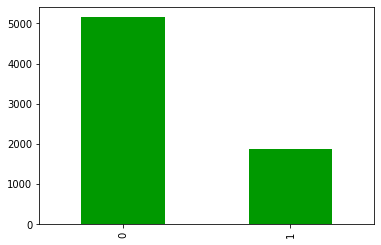

In [63]:
data['target'].value_counts().plot(kind='bar', color='#009900')
plt.show()

In [64]:
data['target'].value_counts()[0]/data['target'].value_counts()[1]

2.7615219721329045

In [65]:
target_train = target_train.reset_index(drop=True)
target_test = target_test.reset_index(drop=True)

In [66]:
def downsample(features, target, fraction):
    features_zeros = features.loc[target == 0]
    features_ones = features.loc[target == 1]
    target_zeros = target.loc[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=random_state)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=random_state)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=random_state)
    
    return features_downsampled, target_downsampled

features_downsampled, target_downsampled = downsample(transformed_train, target_train, 0.4)

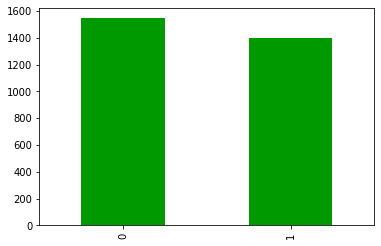

In [67]:
target_downsampled.value_counts().plot(kind='bar', color='#009900')
plt.show()

In [68]:
features_downsampled.shape

(2945, 26)

### Мультиколлинеарность

Проанализируем мультиколлинеарность с помощью Phik.

Построим корреляционную матрицу, содержащую попарные коэффициенты 𝜙k.

In [69]:
phik_overview = features_downsampled.phik_matrix()
phik_overview.round(2)

,onehotencoder__x0_month-to-month,onehotencoder__x0_one year,onehotencoder__x0_two year,onehotencoder__x1_bank transfer (automatic),onehotencoder__x1_credit card (automatic),onehotencoder__x1_electronic check,onehotencoder__x1_mailed check,onehotencoder__x2_female,onehotencoder__x2_male,onehotencoder__x3_dsl,...,Partner,Dependents,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines,loyalty
onehotencoder__x0_month-to-month,1.00,0.83,0.84,0.26,0.35,0.49,0.01,0.00,0.00,0.16,...,0.39,0.34,0.42,0.29,0.36,0.49,0.19,0.16,0.13,0.82
onehotencoder__x0_one year,0.83,1.00,0.33,0.09,0.10,0.19,0.01,0.00,0.00,0.10,...,0.14,0.15,0.21,0.17,0.20,0.21,0.12,0.08,0.00,0.47
onehotencoder__x0_two year,0.84,0.33,1.00,0.22,0.33,0.43,0.00,0.00,0.00,0.10,...,0.35,0.27,0.32,0.18,0.25,0.41,0.12,0.11,0.16,0.79
onehotencoder__x1_bank transfer (automatic),0.26,0.09,0.22,1.00,0.35,0.60,0.37,0.00,0.00,0.04,...,0.19,0.11,0.13,0.14,0.13,0.13,0.01,0.00,0.06,0.33
onehotencoder__x1_credit card (automatic),0.35,0.10,0.33,0.35,1.00,0.60,0.37,0.01,0.01,0.09,...,0.09,0.09,0.18,0.11,0.13,0.20,0.00,0.02,0.08,0.36
onehotencoder__x1_electronic check,0.49,0.19,0.43,0.60,0.60,1.00,0.63,0.00,0.00,0.21,...,0.13,0.25,0.21,0.00,0.02,0.21,0.24,0.23,0.15,0.36
onehotencoder__x1_mailed check,0.01,0.01,0.00,0.37,0.37,0.63,1.00,0.00,0.00,0.12,...,0.11,0.10,0.03,0.23,0.22,0.06,0.31,0.33,0.33,0.26
onehotencoder__x2_female,0.00,0.00,0.00,0.00,0.01,0.00,0.00,1.00,1.00,0.00,...,0.00,0.00,0.03,0.00,0.00,0.03,0.00,0.00,0.00,0.04
onehotencoder__x2_male,0.00,0.00,0.00,0.00,0.01,0.00,0.00,1.00,1.00,0.00,...,0.00,0.00,0.03,0.00,0.00,0.03,0.00,0.00,0.00,0.04
onehotencoder__x3_dsl,0.16,0.10,0.10,0.04,0.09,0.21,0.12,0.00,0.00,1.00,...,0.00,0.10,0.45,0.20,0.15,0.42,0.05,0.05,0.37,0.10


Проилюстрируем ее на плоте.

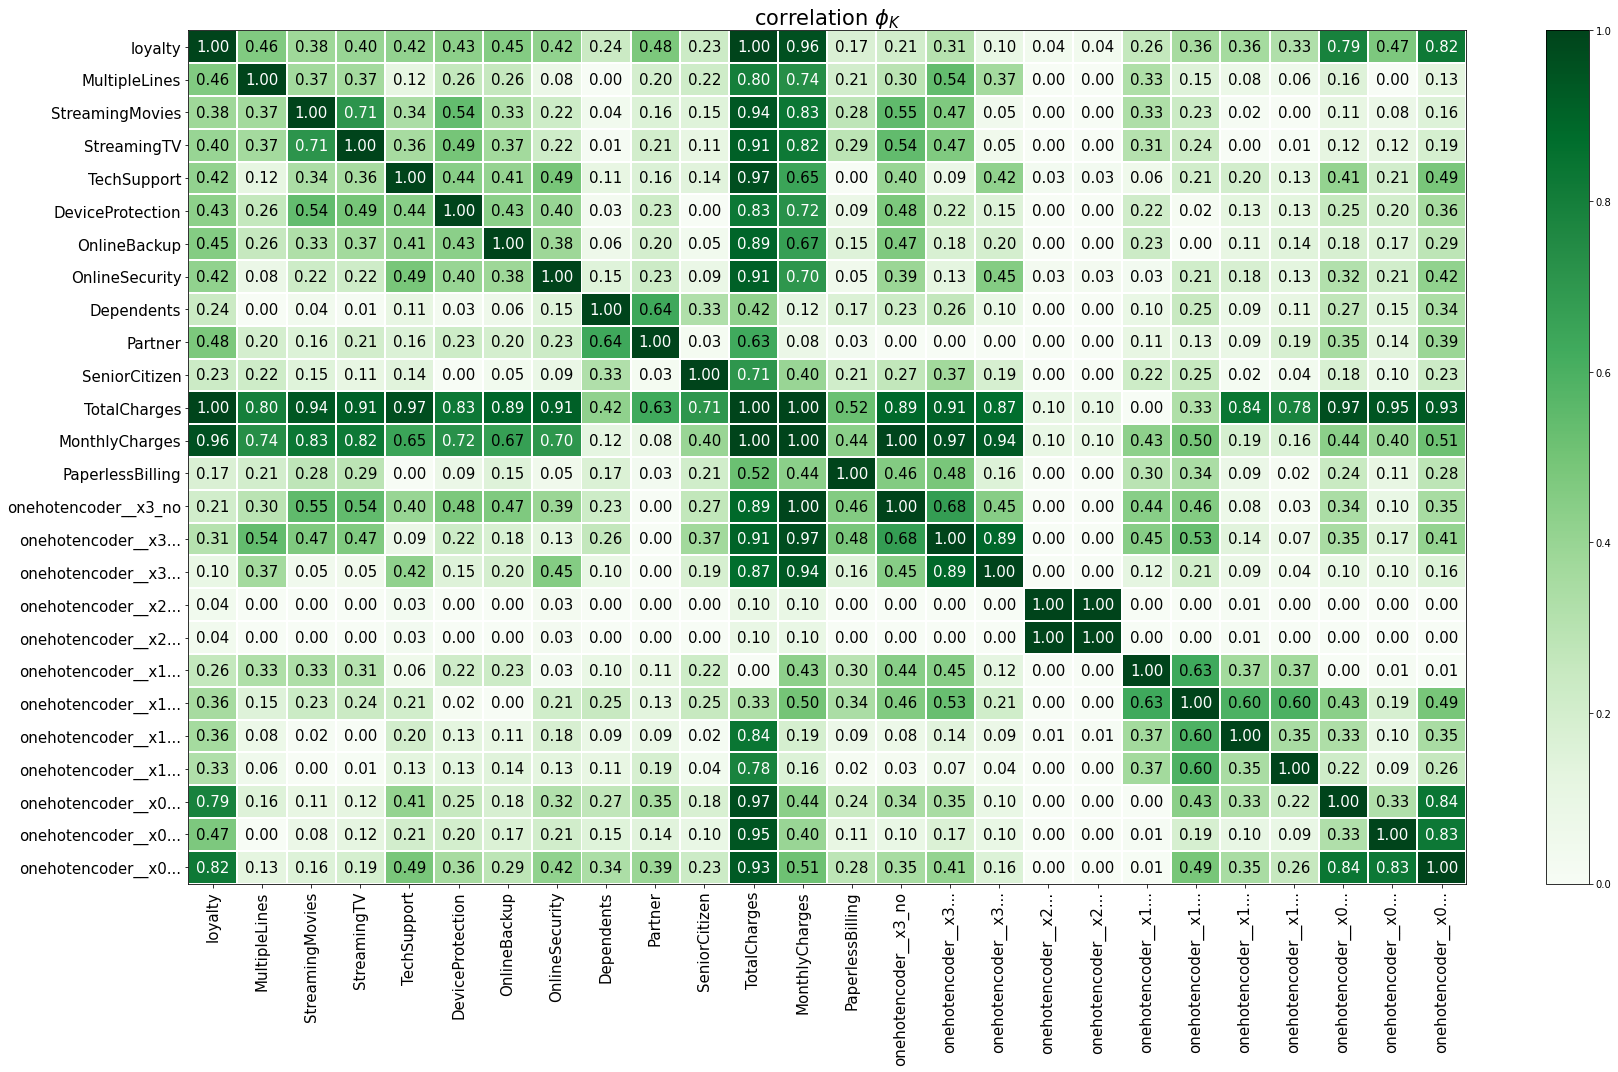

In [70]:
plot_correlation_matrix(phik_overview.values, 
                        x_labels=phik_overview.columns, 
                        y_labels=phik_overview.index, 
                        vmin=0, vmax=1, color_map="Greens", 
                        title=r"correlation $\phi_K$", 
                        fontsize_factor=1.5, 
                        figsize=(25, 15))
plt.tight_layout()

Есть ряд однозначно важных признаков, которые кажется правильным исключить из анализа на коллинеарность, тк удалять их нецелесообразно:

'MonthlyCharges',  'loyalty'

In [71]:
phik_overview.values 

array([[1.        , 0.82645769, 0.83730886, 0.25701609, 0.35034384,
        0.49169405, 0.00512437, 0.        , 0.        , 0.16051884,
        0.41019067, 0.35368968, 0.28249469, 0.51261232, 0.9318027 ,
        0.22879792, 0.3939315 , 0.33731199, 0.4181773 , 0.28515547,
        0.35905157, 0.48566209, 0.19397745, 0.15910423, 0.12683443,
        0.8229874 ],
       [0.82645769, 1.        , 0.32797065, 0.09472131, 0.10222981,
        0.18791495, 0.01469333, 0.        , 0.        , 0.10005122,
        0.16879068, 0.09509066, 0.10805712, 0.39755731, 0.94645085,
        0.09951461, 0.14098806, 0.14852559, 0.21020629, 0.17116619,
        0.20090225, 0.20553522, 0.11976483, 0.08368258, 0.        ,
        0.4733669 ],
       [0.83730886, 0.32797065, 1.        , 0.222264  , 0.33265371,
        0.43497688, 0.        , 0.        , 0.        , 0.09502977,
        0.34773688, 0.34319469, 0.2422385 , 0.43701381, 0.96795447,
        0.1821612 , 0.35266621, 0.27343455, 0.31889602, 0.18491113,
      

In [72]:
phik_overview.columns

Index(['onehotencoder__x0_month-to-month', 'onehotencoder__x0_one year',
       'onehotencoder__x0_two year',
       'onehotencoder__x1_bank transfer (automatic)',
       'onehotencoder__x1_credit card (automatic)',
       'onehotencoder__x1_electronic check', 'onehotencoder__x1_mailed check',
       'onehotencoder__x2_female', 'onehotencoder__x2_male',
       'onehotencoder__x3_dsl', 'onehotencoder__x3_fiber optic',
       'onehotencoder__x3_no', 'PaperlessBilling', 'MonthlyCharges',
       'TotalCharges', 'SeniorCitizen', 'Partner', 'Dependents',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'MultipleLines', 'loyalty'],
      dtype='object')

In [73]:
upper_tri = phik_overview.where(np.triu(np.ones(phik_overview.shape),k=1).astype(np.bool))
print(upper_tri)

                                             onehotencoder__x0_month-to-month  \
onehotencoder__x0_month-to-month                                          NaN   
onehotencoder__x0_one year                                                NaN   
onehotencoder__x0_two year                                                NaN   
onehotencoder__x1_bank transfer (automatic)                               NaN   
onehotencoder__x1_credit card (automatic)                                 NaN   
onehotencoder__x1_electronic check                                        NaN   
onehotencoder__x1_mailed check                                            NaN   
onehotencoder__x2_female                                                  NaN   
onehotencoder__x2_male                                                    NaN   
onehotencoder__x3_dsl                                                     NaN   
onehotencoder__x3_fiber optic                                             NaN   
onehotencoder__x3_no        

In [74]:
to_drop = [column for column in upper_tri.columns.drop(['MonthlyCharges', 'loyalty']) if any(upper_tri[column] > 0.95)]
print()
print(to_drop)


['onehotencoder__x2_male', 'TotalCharges', 'TechSupport']


Удалим признаки по прогу 0,95

In [75]:
features_clear_train = features_downsampled.drop(features_downsampled[['TotalCharges','onehotencoder__x2_male', 'StreamingTV', 'StreamingMovies']], axis=1)

In [76]:
features_clear_test = transformed_test.drop(transformed_test[['TotalCharges','onehotencoder__x2_male', 'StreamingTV', 'StreamingMovies']], axis=1)
features_clear_test.shape

(1755, 22)

## Масштабирование данных

Для линейных моделей также необходимо масштабировать числовые признаки, перевести их в диапазон [0,1]

In [77]:
numeric = ['MonthlyCharges', 'loyalty']

scaler = StandardScaler()
scaler.fit(features_clear_train[numeric])

features_clear_train[numeric] = scaler.transform(features_clear_train[numeric])
features_clear_test[numeric] = scaler.transform(features_clear_test[numeric])


print(features_clear_train.head(3))

     onehotencoder__x0_month-to-month onehotencoder__x0_one year  \
1352                              0.0                        1.0   
4448                              0.0                        1.0   
107                               0.0                        0.0   

     onehotencoder__x0_two year onehotencoder__x1_bank transfer (automatic)  \
1352                        0.0                                         0.0   
4448                        0.0                                         0.0   
107                         1.0                                         0.0   

     onehotencoder__x1_credit card (automatic)  \
1352                                       0.0   
4448                                       0.0   
107                                        0.0   

     onehotencoder__x1_electronic check onehotencoder__x1_mailed check  \
1352                                1.0                            0.0   
4448                                1.0                      

## Обучение моделей, подбор параметров

In [78]:
scorer = make_scorer(roc_auc_score)

## LogisticRegression

Реализуем гридсерч для логистической регрессии. Модели на вход идут подготовленные датасеты с удаленными коллинеарными признаками и масштабированными данными.

In [79]:
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]} # l1 lasso l2 ridge
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,scoring=scorer,cv=5)
logreg_cv.fit(features_clear_train,target_downsampled)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("roc_auc :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.01, 'penalty': 'l2'}
roc_auc : 0.7596371278441432


In [80]:
clf = LogisticRegression(random_state=random_state, C= 10.0, penalty= 'l2').fit(features_clear_train,target_downsampled)

Отследим важность признаков, чтобы по возможности удалить неважные и поднять метрику

In [81]:
clf.coef_[0]

array([ 0.72885784, -0.0247967 , -0.70451026, -0.03265168, -0.10229498,
        0.20619422, -0.07169668,  0.15122622,  0.17063739,  0.57959304,
       -0.75067956,  0.35502813,  0.2614744 ,  0.3080646 ,  0.02736386,
       -0.22334798, -0.5412585 , -0.02362433, -0.06679056, -0.46863548,
        0.20293815, -0.67977865])

In [82]:
clf.coef_[0].min()

-0.7506795582049383

Feature: 0, Score: 0.72886
Feature: 1, Score: -0.02480
Feature: 2, Score: -0.70451
Feature: 3, Score: -0.03265
Feature: 4, Score: -0.10229
Feature: 5, Score: 0.20619
Feature: 6, Score: -0.07170
Feature: 7, Score: 0.15123
Feature: 8, Score: 0.17064
Feature: 9, Score: 0.57959
Feature: 10, Score: -0.75068
Feature: 11, Score: 0.35503
Feature: 12, Score: 0.26147
Feature: 13, Score: 0.30806
Feature: 14, Score: 0.02736
Feature: 15, Score: -0.22335
Feature: 16, Score: -0.54126
Feature: 17, Score: -0.02362
Feature: 18, Score: -0.06679
Feature: 19, Score: -0.46864
Feature: 20, Score: 0.20294
Feature: 21, Score: -0.67978


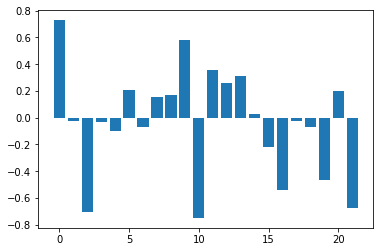

In [83]:
# get importance
importance = clf.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [84]:
features_clear_train.columns

Index(['onehotencoder__x0_month-to-month', 'onehotencoder__x0_one year',
       'onehotencoder__x0_two year',
       'onehotencoder__x1_bank transfer (automatic)',
       'onehotencoder__x1_credit card (automatic)',
       'onehotencoder__x1_electronic check', 'onehotencoder__x1_mailed check',
       'onehotencoder__x2_female', 'onehotencoder__x3_dsl',
       'onehotencoder__x3_fiber optic', 'onehotencoder__x3_no',
       'PaperlessBilling', 'MonthlyCharges', 'SeniorCitizen', 'Partner',
       'Dependents', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'MultipleLines', 'loyalty'],
      dtype='object')

Рассмотрев важность признаков, можно удалить наименее полезные признаки.

In [85]:
features_clear_train = features_clear_train.drop(['onehotencoder__x0_two year','onehotencoder__x3_fiber optic'],axis=1)
features_clear_test = features_clear_test.drop(['onehotencoder__x0_two year','onehotencoder__x3_fiber optic'],axis=1)


In [86]:
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]} # l1 lasso l2 ridge
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,scoring=scorer,cv=5)
logreg_cv.fit(features_clear_train,target_downsampled)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("roc_auc :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 10.0, 'penalty': 'l2'}
roc_auc : 0.7590530127908768


In [87]:
lr_best_score = round(logreg_cv.best_score_,4)
lr_best_score

0.7591

Результат логистической регрессии на кросс-валидации 0.7509

## Random Forest

Реализуем гридсерч для модели случайного леса с параметрами сетки: 'n_estimators': [200, 500],'max_depth' : [4,5,6,7,8].

In [88]:
rfc=RandomForestClassifier(random_state=random_state)

param_grid = { 
    'n_estimators': [200, 500],
    'max_depth' : [4,5,6,7,8],
}

CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid,scoring=scorer, cv=5)
CV_rfc.fit(features_clear_train,target_downsampled)


print(CV_rfc.best_params_)

{'max_depth': 8, 'n_estimators': 200}


In [89]:
rf_best_score = round(CV_rfc.best_score_,4)
rf_best_score

0.7776

## CatBoostClassifier

Для начала реализуем модель без гридсерча, чтобы посмотреть на первоначальный результат и извлечь важность признаков.

In [90]:
model = CatBoostClassifier(loss_function="Logloss", iterations=1000, random_state=random_state)

model.fit(features_downsampled, target_downsampled,verbose=100)

'''probabilities_valid = model.predict_proba(transformed_test)
probabilities_one_test = probabilities_valid[:, 1]
print(roc_auc_score(target_test, probabilities_one_test))
'''

Learning rate set to 0.016339
0:	learn: 0.6862474	total: 48.7ms	remaining: 48.6s
100:	learn: 0.4652271	total: 259ms	remaining: 2.31s
200:	learn: 0.4261535	total: 457ms	remaining: 1.82s
300:	learn: 0.4018197	total: 656ms	remaining: 1.52s
400:	learn: 0.3833203	total: 851ms	remaining: 1.27s
500:	learn: 0.3634472	total: 1.03s	remaining: 1.03s
600:	learn: 0.3445512	total: 1.22s	remaining: 811ms
700:	learn: 0.3289272	total: 1.4s	remaining: 599ms
800:	learn: 0.3136883	total: 1.59s	remaining: 395ms
900:	learn: 0.2996802	total: 1.78s	remaining: 196ms
999:	learn: 0.2860844	total: 1.97s	remaining: 0us


'probabilities_valid = model.predict_proba(transformed_test)\nprobabilities_one_test = probabilities_valid[:, 1]\nprint(roc_auc_score(target_test, probabilities_one_test))\n'

In [91]:
## Не будет работать, тк features_upsampled, target_upsample уже нет :)

'''# Код тимлида
model = CatBoostClassifier(loss_function="Logloss", iterations=30, random_state=random_state)

model.fit(features_upsampled, target_upsampled,verbose=10)

probabilities_valid = model.predict_proba(features_test)
probabilities_one_test = probabilities_valid[:, 1]
print(roc_auc_score(target_test, probabilities_one_test))'''


'# Код тимлида\nmodel = CatBoostClassifier(loss_function="Logloss", iterations=30, random_state=random_state)\n\nmodel.fit(features_upsampled, target_upsampled,verbose=10)\n\nprobabilities_valid = model.predict_proba(features_test)\nprobabilities_one_test = probabilities_valid[:, 1]\nprint(roc_auc_score(target_test, probabilities_one_test))'

Посмотрим на важность признаков.

In [92]:
def plot_feature_importance(importance,names,model_type):
    
    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)
    
    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)
    
    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)
    
    #Define size of bar plot
    plt.figure(figsize=(10,8))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title(model_type + 'FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')

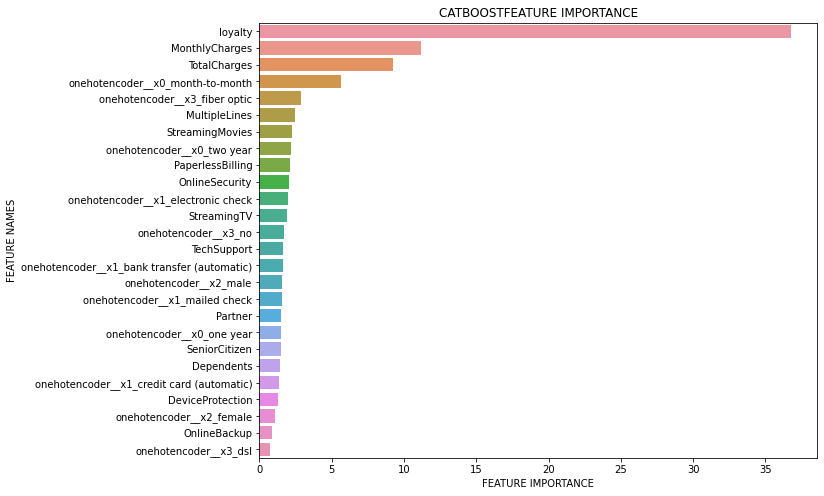

In [93]:
plot_feature_importance(model.get_feature_importance(),features_downsampled.columns,'CATBOOST')

In [94]:
features_downsampled.columns

Index(['onehotencoder__x0_month-to-month', 'onehotencoder__x0_one year',
       'onehotencoder__x0_two year',
       'onehotencoder__x1_bank transfer (automatic)',
       'onehotencoder__x1_credit card (automatic)',
       'onehotencoder__x1_electronic check', 'onehotencoder__x1_mailed check',
       'onehotencoder__x2_female', 'onehotencoder__x2_male',
       'onehotencoder__x3_dsl', 'onehotencoder__x3_fiber optic',
       'onehotencoder__x3_no', 'PaperlessBilling', 'MonthlyCharges',
       'TotalCharges', 'SeniorCitizen', 'Partner', 'Dependents',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'MultipleLines', 'loyalty'],
      dtype='object')

Рассмотрев важность признаков, можно не использовать наименее полезные признаки, запишем их в ignored_features.

In [95]:
ignored_features =[
       'onehotencoder__x0_one year',
       'onehotencoder__x3_dsl',
       'onehotencoder__x2_female', 
        'OnlineBackup', 'DeviceProtection']

In [96]:
cat_model = CatBoostClassifier(random_state=random_state,ignored_features=ignored_features) 
params = {'learning_rate': [ 0.1],
          'depth': [3],
          'iterations':[500]
         }

grid = GridSearchCV(estimator=cat_model, param_grid=params, scoring='roc_auc', cv=5)

grid.fit(features_downsampled, target_downsampled,verbose=100)

print('Лучшие параметры',grid.best_params_)
print('Best validation score',grid.best_score_)


0:	learn: 0.6582226	total: 778us	remaining: 389ms
100:	learn: 0.4248163	total: 70.8ms	remaining: 280ms
200:	learn: 0.3713057	total: 138ms	remaining: 205ms
300:	learn: 0.3347133	total: 198ms	remaining: 131ms
400:	learn: 0.3063711	total: 256ms	remaining: 63.3ms
499:	learn: 0.2803465	total: 314ms	remaining: 0us
0:	learn: 0.6543523	total: 855us	remaining: 427ms
100:	learn: 0.4146823	total: 65.4ms	remaining: 258ms
200:	learn: 0.3683039	total: 131ms	remaining: 195ms
300:	learn: 0.3334122	total: 204ms	remaining: 135ms
400:	learn: 0.3058300	total: 274ms	remaining: 67.7ms
499:	learn: 0.2830705	total: 334ms	remaining: 0us
0:	learn: 0.6546411	total: 871us	remaining: 435ms
100:	learn: 0.4085702	total: 67.7ms	remaining: 268ms
200:	learn: 0.3603875	total: 157ms	remaining: 233ms
300:	learn: 0.3256546	total: 228ms	remaining: 151ms
400:	learn: 0.2984696	total: 305ms	remaining: 75.3ms
499:	learn: 0.2765204	total: 370ms	remaining: 0us
0:	learn: 0.6561648	total: 790us	remaining: 394ms
100:	learn: 0.417091

Реализуем гридсерч.

In [97]:
cat_model = CatBoostClassifier(random_state=random_state,ignored_features=ignored_features) 
params = {'learning_rate': [0.03, 0.1],
          'depth': [3,4,5],
          'iterations':[100,500,1000, 2000]
         }

grid = GridSearchCV(estimator=cat_model, param_grid=params, scoring='roc_auc', cv=5)

grid.fit(features_downsampled, target_downsampled,verbose=100)

print('Лучшие параметры',grid.best_params_)
print('Best validation score',grid.best_score_)


0:	learn: 0.6821568	total: 868us	remaining: 86ms
99:	learn: 0.4753513	total: 66.3ms	remaining: 0us
0:	learn: 0.6809262	total: 706us	remaining: 70ms
99:	learn: 0.4651425	total: 79.2ms	remaining: 0us
0:	learn: 0.6810217	total: 746us	remaining: 73.9ms
99:	learn: 0.4642208	total: 61.8ms	remaining: 0us
0:	learn: 0.6815029	total: 1.04ms	remaining: 103ms
99:	learn: 0.4683496	total: 77.9ms	remaining: 0us
0:	learn: 0.6812448	total: 753us	remaining: 74.6ms
99:	learn: 0.4725994	total: 79.7ms	remaining: 0us
0:	learn: 0.6582226	total: 762us	remaining: 75.5ms
99:	learn: 0.4249808	total: 59.4ms	remaining: 0us
0:	learn: 0.6543523	total: 831us	remaining: 82.3ms
99:	learn: 0.4149739	total: 79.4ms	remaining: 0us
0:	learn: 0.6546411	total: 833us	remaining: 82.5ms
99:	learn: 0.4089463	total: 81.9ms	remaining: 0us
0:	learn: 0.6561648	total: 869us	remaining: 86.1ms
99:	learn: 0.4178514	total: 61ms	remaining: 0us
0:	learn: 0.6553531	total: 797us	remaining: 79ms
99:	learn: 0.4191076	total: 64.4ms	remaining: 0u

In [98]:
cb_best_score = round(grid.best_score_,4)
cb_best_score

0.9068

## Анализ моделей

В таблице ниже результаты всех моделей на кросс-валидации.

In [99]:
test_result_models = {'LogisticRegression':[lr_best_score],'CatBoostRegressor':[cb_best_score],'RandomForrest':[rf_best_score]}
test_results =  pd.DataFrame(test_result_models)
test_results

,LogisticRegression,CatBoostRegressor,RandomForrest
0,0.7591,0.9068,0.7776


Лучшийрезультат показал catboost `0.9068`. Инициализируем и обучим модель с подобранными параметрами

In [100]:
best_model = CatBoostClassifier(random_state=random_state,ignored_features=ignored_features, depth= 3, iterations= 2000, learning_rate= 0.1)

In [101]:
best_model.fit(features_downsampled, target_downsampled,verbose=100)

0:	learn: 0.6557581	total: 873us	remaining: 1.75s
100:	learn: 0.4204516	total: 73.4ms	remaining: 1.38s
200:	learn: 0.3709787	total: 146ms	remaining: 1.31s
300:	learn: 0.3377240	total: 219ms	remaining: 1.23s
400:	learn: 0.3115410	total: 291ms	remaining: 1.16s
500:	learn: 0.2887268	total: 362ms	remaining: 1.08s
600:	learn: 0.2718641	total: 438ms	remaining: 1.02s
700:	learn: 0.2551334	total: 511ms	remaining: 947ms
800:	learn: 0.2387628	total: 585ms	remaining: 875ms
900:	learn: 0.2261746	total: 658ms	remaining: 803ms
1000:	learn: 0.2135195	total: 737ms	remaining: 735ms
1100:	learn: 0.2027804	total: 811ms	remaining: 662ms
1200:	learn: 0.1930139	total: 882ms	remaining: 587ms
1300:	learn: 0.1844314	total: 954ms	remaining: 512ms
1400:	learn: 0.1765976	total: 1.02s	remaining: 437ms
1500:	learn: 0.1687175	total: 1.09s	remaining: 364ms
1600:	learn: 0.1625459	total: 1.17s	remaining: 291ms
1700:	learn: 0.1564985	total: 1.24s	remaining: 218ms
1800:	learn: 0.1502648	total: 1.31s	remaining: 145ms
1900

In [102]:
probabilities_valid = best_model.predict_proba(transformed_test)
probabilities_one_test = probabilities_valid[:, 1]

In [103]:
print(round(roc_auc_score(target_test, probabilities_one_test),4))

0.9015


Результат выбранной модели на тесте `0.9015`. 

## Вывод: 

Были проведены все этапы согласно первоначальнами плану, а также ряд дополнительных действий:

- Обработка мультиколлинеарности признаков для линейной модели
- Масштабировние признаков
- Реализован Downsampling в замену Upsampling
- Для каждой модели реализован gridsearch
- Результаты лучшая модель отбиралась на основе результатов кросс-валидации всех моделей


`Первоначальный план:`

1. Исследовательский анализ данных. Предобработка.
  -  загрузить данные  ✔️
  -  посмотреть основную статистику данных ✔️
  -  изменить типы данных по необходимости ✔️
  -  объединить данные ✔️
  -  проверить наличие пропусков ✔️
  -  проверить наличие дубликатов ✔️
  -  отследить дисбаланс классов ✔️
  -  проверить наличие выбросов и аномалий  ✔️
2. Обучение различных моделей классифицировать клиентов, подбор гиперпараметров. 
  -  отбор и подготовка признаков ✔️
  -  разделение данных на выборки ✔️
  -  выбор моделей для реализации✔️
  -  подбор гиперпараметров и реализация моделей✔️
3. Тестирование.
  -  тестирование моделей на тестовых данных✔️
  -  возможно, корректировка параметров  ✔️
4. Отбор наиболее подходящего инструмента с учетом метрики.
  -  выбор модели наилучшим образом выполняющую задачу. ✔️ 







## Отчет


Были проведены все этапы согласно первоначальнами плану, а также ряд дополнительных действий:

- Обработка мультиколлинеарности признаков для линейной модели
- Масштабировние признаков
- Реализован Downsampling в замену Upsampling
- Для каждой модели реализован gridsearch
- Результаты лучшая модель отбиралась на основе результатов кросс-валидации всех моделей


`Первоначальный план:`

1. Исследовательский анализ данных. Предобработка.
  -  загрузить данные  ✔️
  -  посмотреть основную статистику данных ✔️
  -  изменить типы данных по необходимости ✔️
  -  объединить данные ✔️
  -  проверить наличие пропусков ✔️
  -  проверить наличие дубликатов ✔️
  -  отследить дисбаланс классов ✔️
  -  проверить наличие выбросов и аномалий  ✔️
2. Обучение различных моделей классифицировать клиентов, подбор гиперпараметров. 
  -  отбор и подготовка признаков ✔️
  -  разделение данных на выборки ✔️
  -  выбор моделей для реализации✔️
  -  подбор гиперпараметров и реализация моделей✔️
3. Тестирование.
  -  тестирование моделей на тестовых данных✔️
  -  возможно, корректировка параметров  ✔️
4. Отбор наиболее подходящего инструмента с учетом метрики.
  -  выбор модели наилучшим образом выполняющую задачу. ✔️ 

###### Трудности
Возникли трудности при обработки мультиколлинеарности. Не выявлена причина высоких показателей коллинеарности признака TotalCharges, вследствии чего он был удален.

Но так как обработка коллинеарности относится к линейным моделям, на качество выбранной модели это не повлияло.

###### Ключевые моменты

В данной задаче важным моментом является качественная предобработка данных, и достаточное число деревьев в модели, параметр iterations. 

Важно не потерять данные при объединении таблиц, отследить, что пропуски возникли после объединения, и соответственно их заполнить. 
 
Не допустить утечку целевого признака в обучающие данные, для этого нужно было выделить из  EndDate целевой признак, сформировать из BeginDate и EndDate дополнительный признак и удалить EndDate из таблийцы.

Корректно выровнять дисбаланс.

В результате работы создана модель прогнозирования оттока клиентов из компании, которая с точностью 90% позволяет предсказать, что пользователь планирует уйти, чтобы компания могла предпринять меры.

Выбранныя модель `CatBoostClassifier`. 


В обучении модели использовались признаки:

- 'onehotencoder__x0_month-to-month',
- 'onehotencoder__x0_two year',
- 'onehotencoder__x1_bank transfer (automatic)',
- 'onehotencoder__x1_credit card (automatic)',
- 'onehotencoder__x1_electronic check', 
- 'onehotencoder__x1_mailed check',
- 'onehotencoder__x2_male',
- 'onehotencoder__x3_fiber optic',
- 'onehotencoder__x3_no', 
- 'PaperlessBilling', 
- 'MonthlyCharges',
- 'TotalCharges', 
- 'SeniorCitizen', 
- 'Partner', 
- 'Dependents',
- 'OnlineSecurity',  
- 'TechSupport',
- 'StreamingTV', 
- 'StreamingMovies', 
- 'MultipleLines', 
- 'loyalty'






Была проведена следующая обработка признаков:

- изменены типы данных для: `BeginDate, EndDate, TotalCharges`
- удалены пропуски и дубликаты
- категориальные признаки заменены на бинарные: `'PaperlessBilling','Partner','Dependents','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','MultipleLines'`
- или закодированы с применением OHE: `'Type', 'PaymentMethod','gender','InternetService'` 
- из признаков даты начала и конца контракта, сформирован новый признак `'loyalty'`
- отсеяны наименее важные признаки, с помощью get_feature_importance, исключенные признаки:
       'onehotencoder__x0_one year',
       'onehotencoder__x3_dsl',
       'onehotencoder__x2_female', 
        'OnlineBackup', 'DeviceProtection'


После чего с помощью gridSearch были отобраны следующие гиперпараметры:

- параметры модели: `{'depth': 3, 'iterations': 2000, 'learning_rate': 0.1}` 

- дополнительные, предопределенные заказчиком параметры модели: `random state: 120922, метрика качества AUC-ROC`

- использовалась кросс-валидация: `cv=5`

`Метрика:` метрика качества AUC-ROC на кросс - валидации: `0.9199`, на тесте `0.9015`

Результат отвечает требованиям заказчика. 